# Interactive inference

In [570]:
from models.single_policy import SinglePolicy
from single_agent import SingleAgent
from IPython.display import SVG, display, HTML
import torch
from torch import distributions
import pdb
import vh_graph
import gym
import envdataset
import utils_viz
import utils
import sys
from IPython.display import Image
sys.argv = ['-f'] 

In [571]:
curr_env = gym.make('vh_graph-v0')

In [572]:
ls

belief_example.gv.pdf          Interactive inference.ipynb
dataset/                       logdir/
dataset_subgoals2@             models/
dataset_subgoals3@             old/
dataset_toy@                   output_False.json
dataset_toy3@                  output_True.json
dataset_toy4@                  __pycache__/
data_subgoals_small/           README.md
Demo Belief Find obejct.ipynb  single_agent.py
Digraph.gv                     test_belief.py
Digraph.gv.pdf                 Testing belief.ipynb
Digraph.gv.png                 trainer.py
envdataset.py                  train_script.sh
environment.py                 utils.py
find_object_belief.py          utils_viz.py
graph_example.gv.pdf           wide.png
gt_graph.gv.pdf


In [573]:
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.bc/2019-11-12_21.33.57.388801/chkpt/chkpt_149.pt'

In [574]:
# Set up the policy
args = utils.read_args()
args.max_steps = 1
args.dataset_folder = 'dataset_toy4'
args.interactive = True
dataset_interactive = envdataset.EnvDataset(args, process_progs=False)
print('Starting model...')
policy_net = SinglePolicy(dataset_interactive).cuda()
policy_net = torch.nn.DataParallel(policy_net)
policy_net.eval()
if weights is not None:
    print('Loading weights')
    state_dict = torch.load(weights)
    policy_net.load_state_dict(state_dict['model_params'])

Getting objects from dataset_toy4/obj_names.json...
Starting model...
Loading weights


In [575]:

path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_40.json'
goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net, use_belief=True)
gt_state = curr_env.vh_state.to_dict()

### Set the goal to find pencil 2026

In [576]:
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 2026
goal_str = 'findnode_{}'.format(id_goal)


## View graph

Edges...


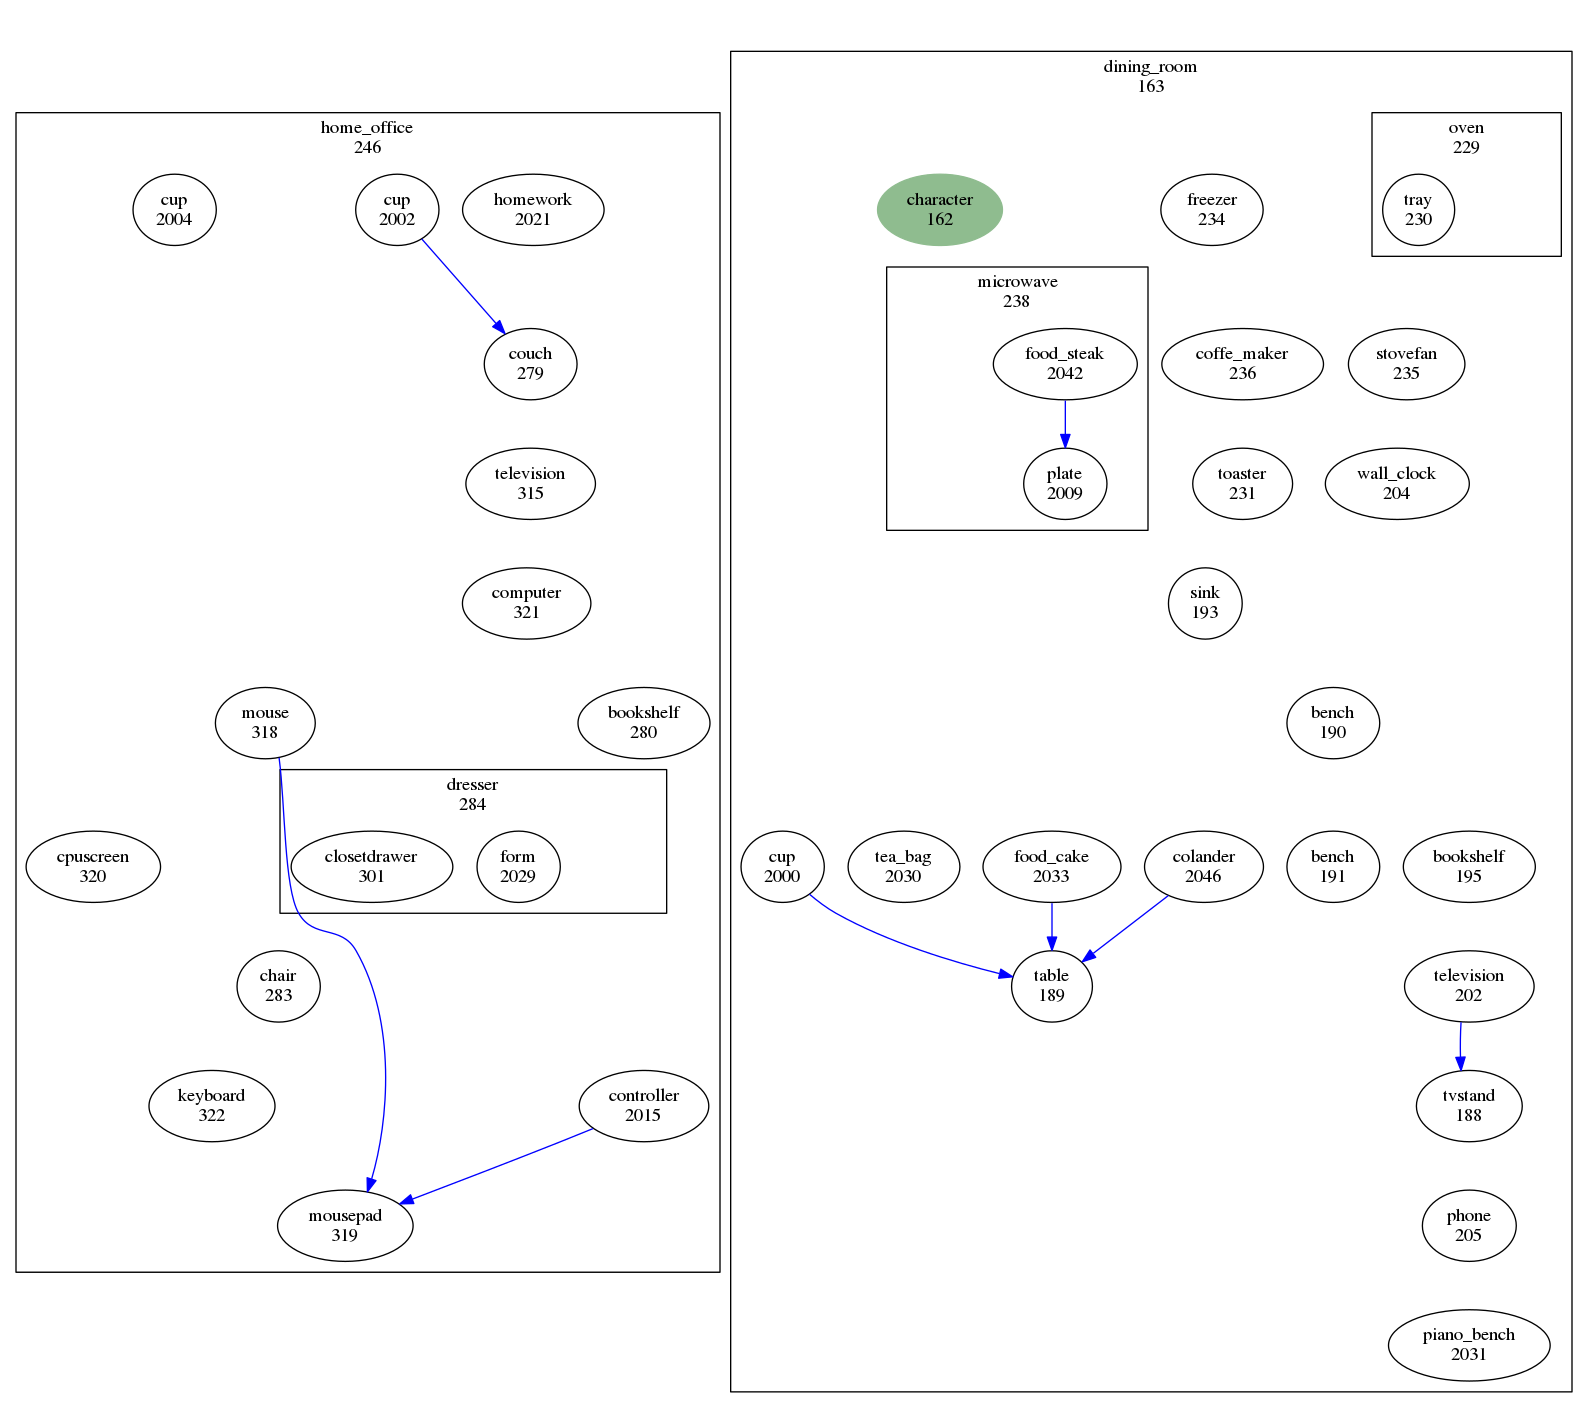

In [577]:
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Explore the model

Edges...


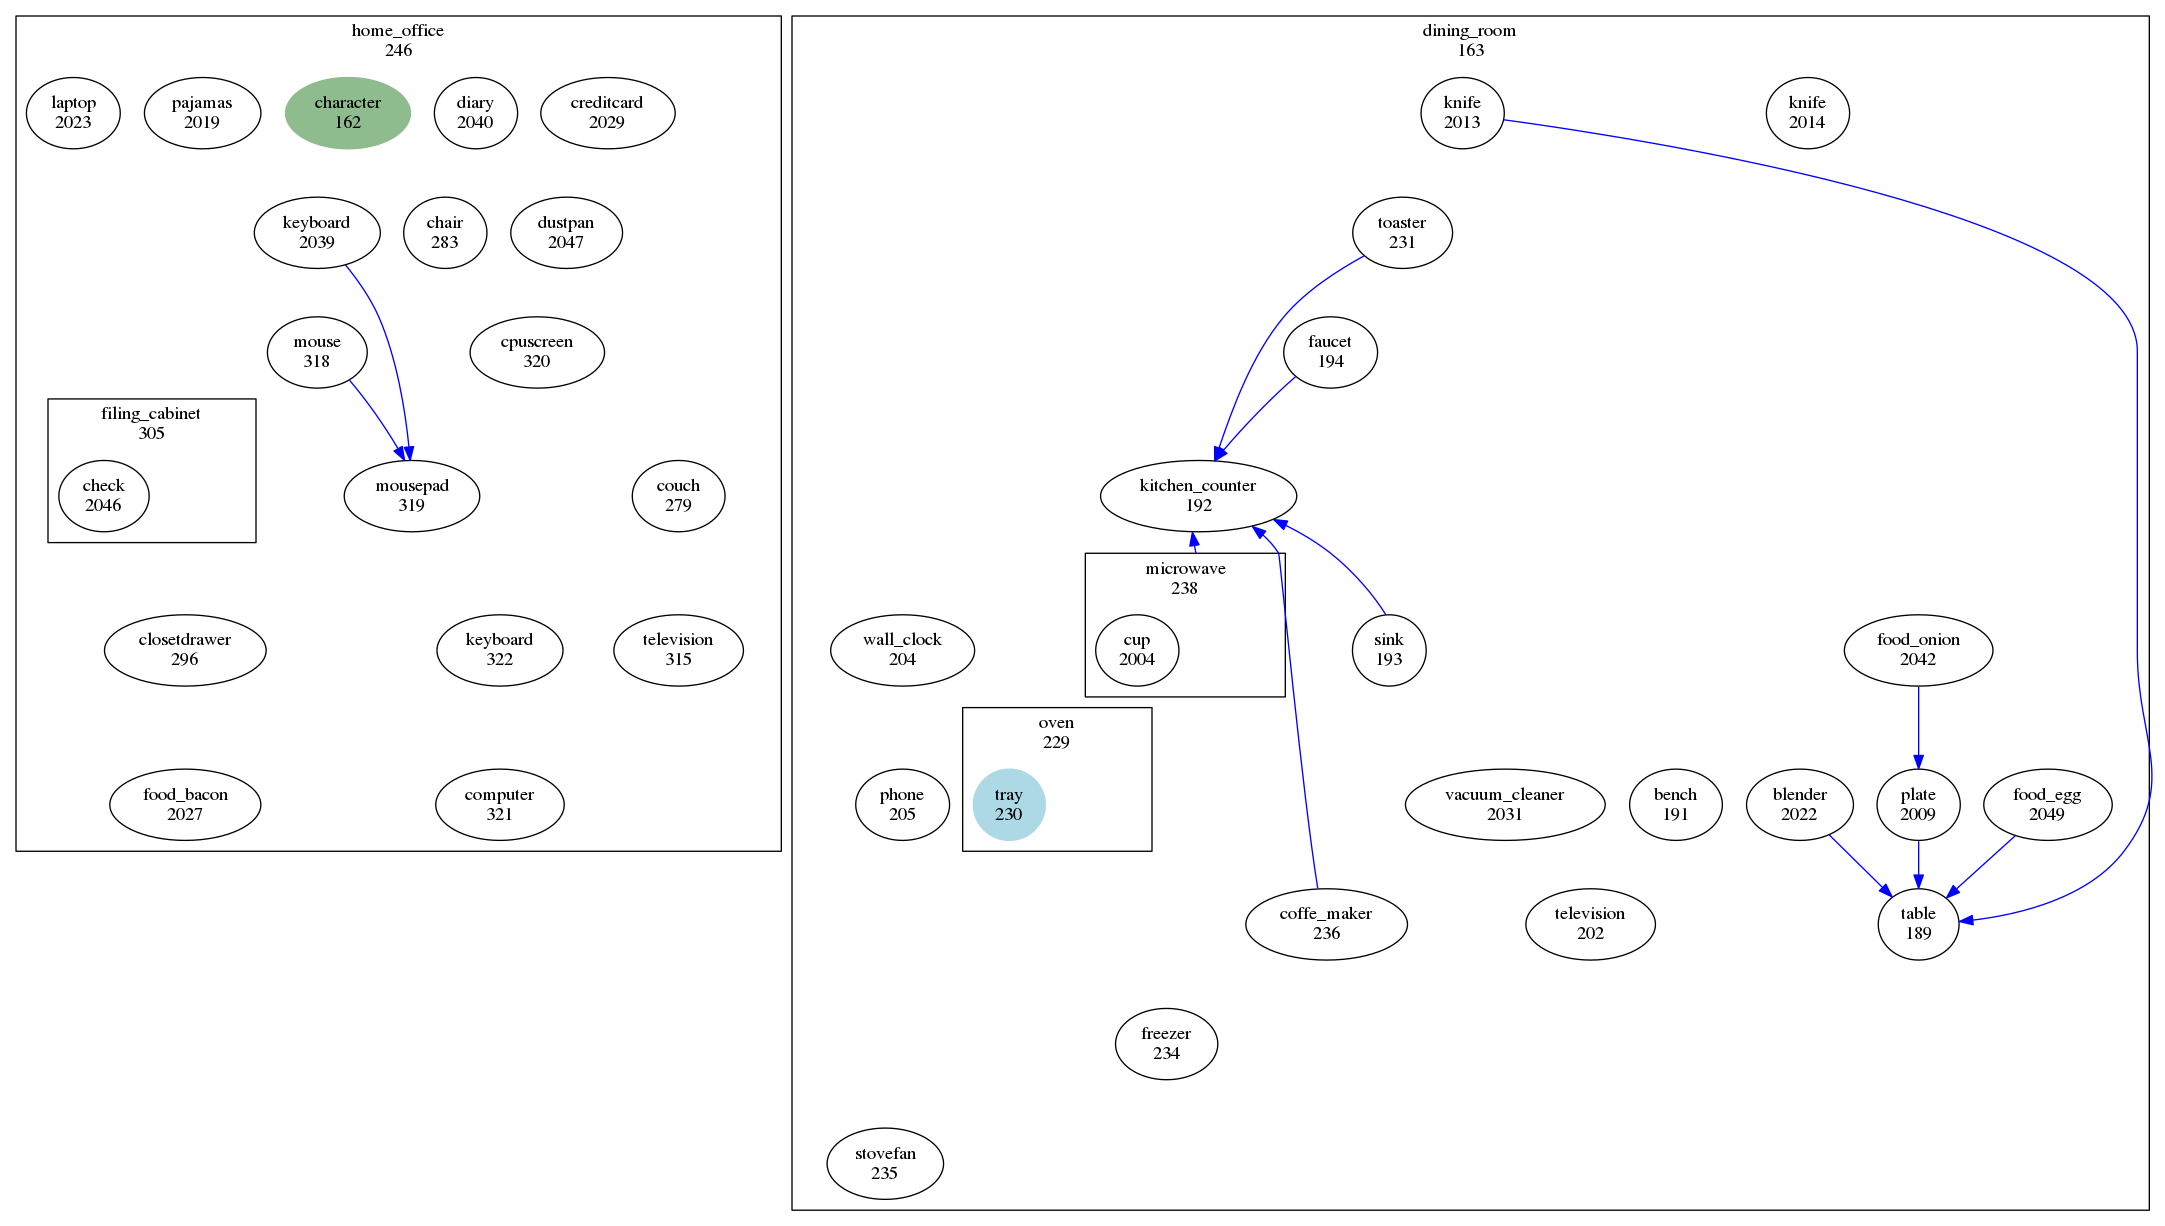

In [578]:
path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_45.json'

goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net)
gt_state = curr_env.vh_state.to_dict()


id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 230

goal_string = 'findnode_{}'.format(id_goal)
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))


In [579]:
# POMDP
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.True_graphsteps.3_training_mode.bc/2019-11-13_19.24.37.715547/chkpt/chkpt_149.pt'
single_agent.env.reset(path_init_env, goal_name)
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
goal_string = 'findnode_2046'

# curr_state['edges'].append({'relation_type': 'CLOSE', 'from_id':id_char ,'to_id': 229})
# curr_state['edges'].append({'relation_type': 'CLOSE', 'from_id':id_char ,'to_id': 230})
#curr_state['edges'] = [x for x in curr_state['edges'] if x['relation_type'] != 'CLOSE' or (x['from_id'] == id_char or x['to_id'] == id_char)]
pomdp = True
instr, _, r, _ = single_agent.rollout(goal_string, pomdp, None, 0., True)
print(instr)
print(r)

['[walk] <dining_room> (163) ', '[walk] <home_office> (246) ', '[walk] <creditcard> (2029) ', '[walk] <dining_room> (163) ', '[walk] <home_office> (246) ', '[walk] <creditcard> (2029) ', '[walk] <dining_room> (163) ', '[walk] <home_office> (246) ', '[walk] <creditcard> (2029) ', '[walk] <dining_room> (163) ']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [580]:

# FOMDP
args.max_steps = 15
single_agent.env.reset(path_init_env, goal_name)
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg/offp.False_eps.0.2_gamma.0.7/2019-11-14_00.45.32.080556/chkpt/chkpt_149.pt'
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
pomdp = False
instr, _, r, _ = single_agent.rollout(goal_string, pomdp, None, 0., True)
print(instr)
print(r)
# while step < nsteps and not finished:    
#     curr_state = single_agent.env.vh_state.to_dict()
#     visible_ids = single_agent.env.observable_object_ids_n[0]
#     graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(curr_state, visible_ids, goal_string)
#     instruction, _ = single_agent.sample_instruction(dataset_interactive, graph_data, action_logits, o1_logits, o2_logits, pick_max=True)
#     instr = list(zip(*instruction))[0]
#     str_instruction = utils.pretty_instr(instr)
#     print(str_instruction)
#     if 'stop' in str_instruction:
#         finished = True
#     else:
#         single_agent.env.step({0: str_instruction})
#     step += 1

['[turnto] <keyboard> (322) ', '[pointat] <keyboard> (322) ', '[walk] <dustpan> (2047) ', '[turnto] <creditcard> (2029) ', '[turnto] <home_office> (246) ', '[turnto] <home_office> (246) ', '[turnto] <dining_room> (163) ', '[walk] <keyboard> (322) ', '[walk] <dining_room> (163) ', '[walk] <table> (189) ']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Getting objects from dataset_toy4/obj_names.json...
Starting model...
Edges...


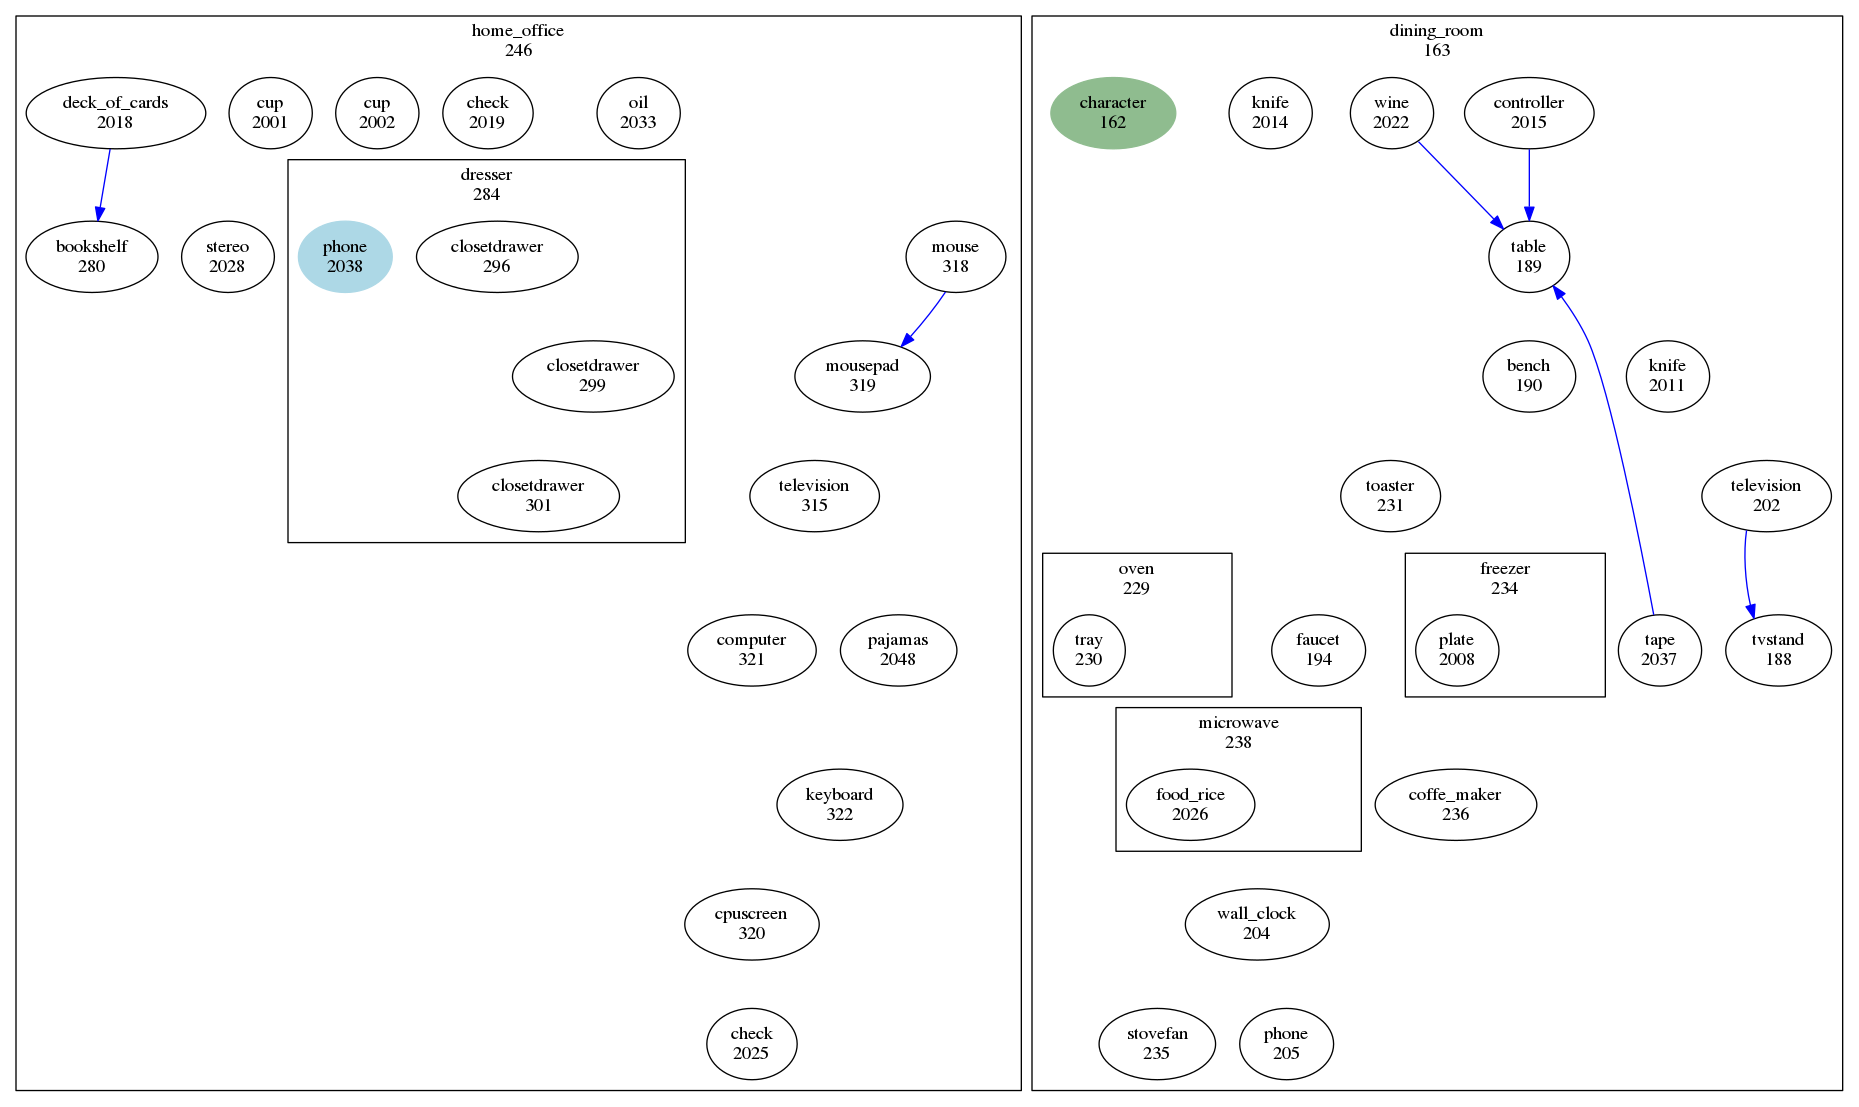

In [581]:
path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_35.json'
id_goal = 2038
str_goal = 'findnode_{}'.format(id_goal)
id_agent = 162

args = utils.read_args()
args.max_steps = 1
args.dataset_folder = 'dataset_toy4'
args.interactive = True
dataset_interactive = envdataset.EnvDataset(args, process_progs=False)
print('Starting model...')
policy_net = SinglePolicy(dataset_interactive).cuda()
policy_net = torch.nn.DataParallel(policy_net)
goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net, use_belief=True)
single_agent.env.reset(path_init_env, goal_name)
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg/offp.False_eps.0.2_gamma.0.7/2019-11-14_00.45.32.080556/chkpt/chkpt_149.pt'
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
single_agent.env.reset(path_init_env, goal_name)
gt_state = single_agent.env.vh_state.to_dict()
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

## Test tianmin

Edges...


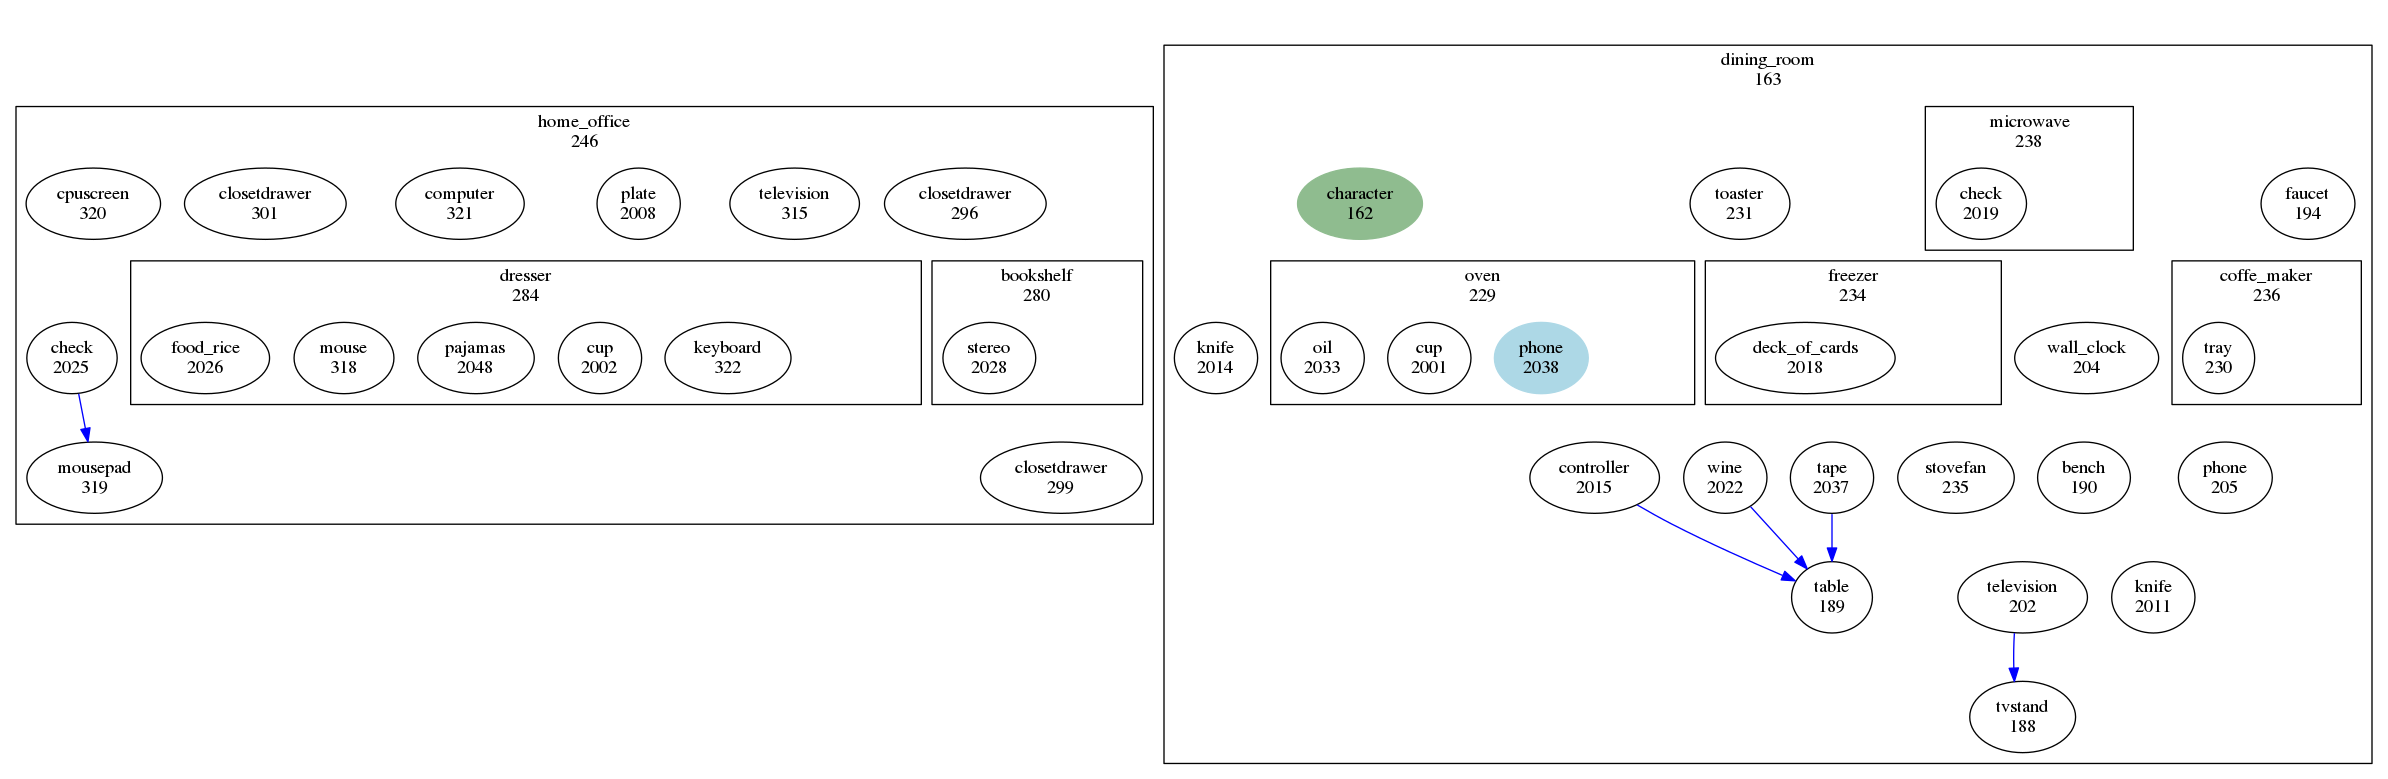

In [582]:
import numpy as np
import random
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
single_agent.env.reset(path_init_env, goal_name)

single_agent.previous_belief_graph = None
obs_graph = single_agent.get_observations()

# graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
# graph.format = 'png'
# tmp = graph.view()

# display(Image(tmp))

#print([x for x in single_agent.belief.sampled_graph['edges'] if x['to_id'] == 280 or x['from_id'] == 280])
#print([x for x in obs_graph['edges'] if x['to_id'] == 280 or x['from_id'] == 280])
single_agent.sample_belief(obs_graph)

graph = utils_viz.graph2im(single_agent.belief_sim.vh_state.to_dict(), {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()

display(Image(tmp))

{}
[163, 188, 189, 190, 194, 202, 204, 205, 229, 231, 234, 235, 236, 238, 246, 2011, 2014, 2015, 2022, 2037, 1099, 162]
Edges...


['[walk] <dining_room> (163)', '[walk] <tvstand> (188)', '[walk] <table> (189)', '[walk] <bench> (190)', '[walk] <faucet> (194)', '[walk] <television> (202)', '[walk] <wall_clock> (204)', '[walk] <phone> (205)', '[walk] <oven> (229)', '[walk] <toaster> (231)', '[walk] <freezer> (234)', '[walk] <stovefan> (235)', '[walk] <coffe_maker> (236)', '[walk] <microwave> (238)', '[walk] <home_office> (246)', '[walk] <knife> (2011)', '[walk] <knife> (2014)', '[walk] <controller> (2015)', '[walk] <wine> (2022)', '[walk] <tape> (2037)', '[walk] <door> (1099)', '[turnto] <dining_room> (163)', '[turnto] <tvstand> (188)', '[turnto] <table> (189)', '[turnto] <bench> (190)', '[turnto] <faucet> (194)', '[turnto] <television> (202)', '[turnto] <wall_clock> (204)', '[turnto] <phone> (205)', '[turnto] <oven> (229)', '[turnto] <toaster> (231)', '[turnto] <freezer> (234)', '[turnto] <stovefan> (235)', '[turnto] <coffe_maker> (236)', '[turnto] <microwave> (238)', '[turnto] <home_office> (246)', '[turnto] <knif

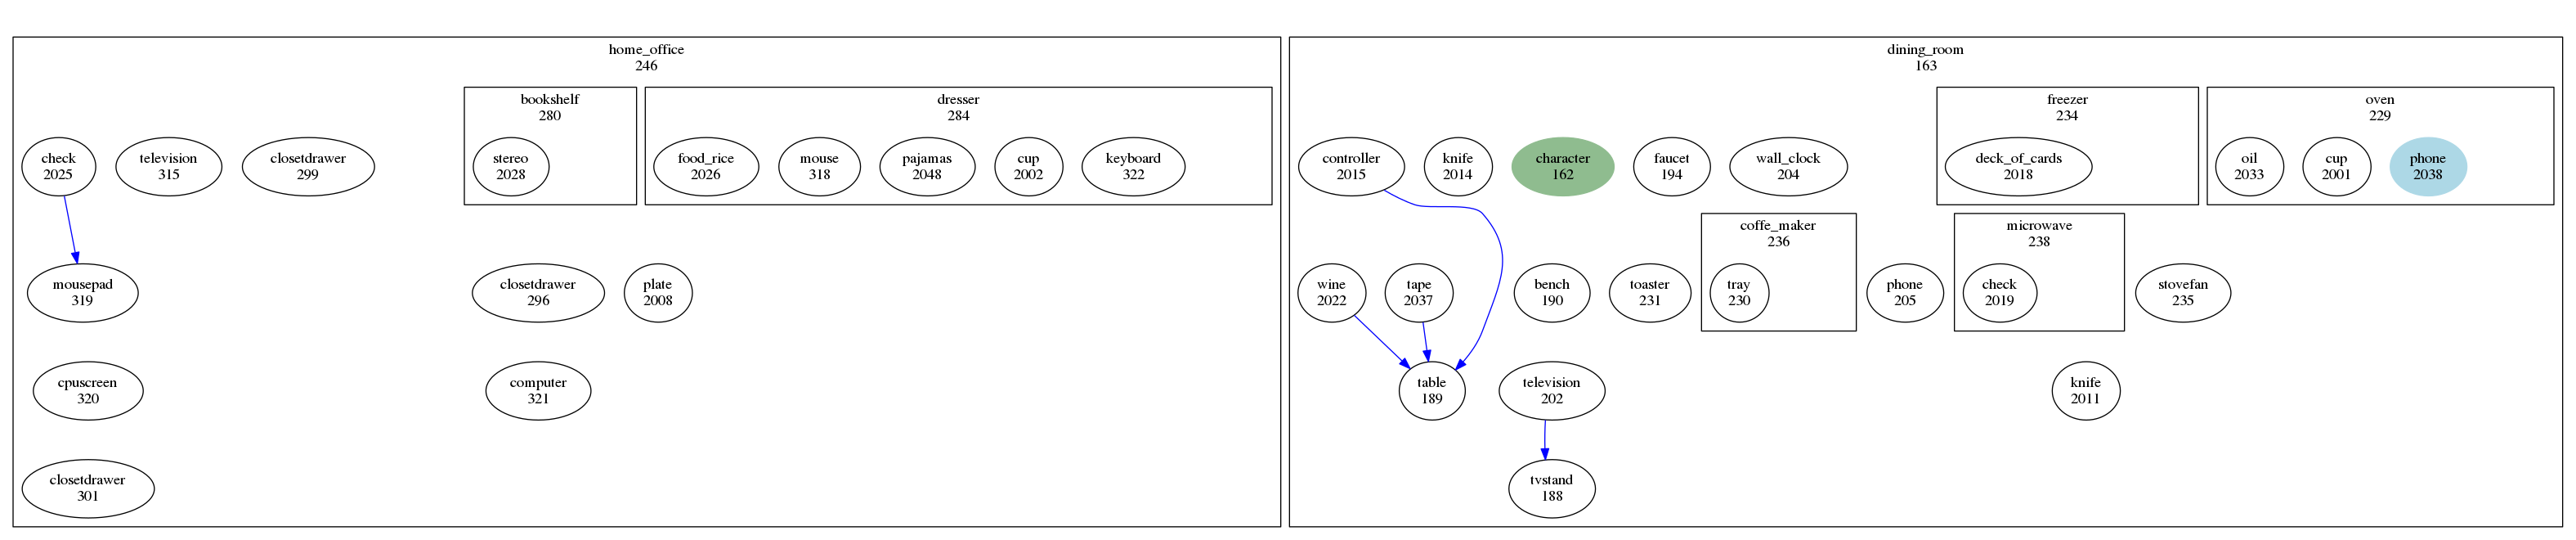

In [583]:
print(single_agent.env.vh_state._script_objects)

observations = single_agent.get_observations()
single_agent.sample_belief(observations)
curr_state = single_agent.belief_sim.vh_state.to_dict()
visible_ids = single_agent.belief_sim.observable_object_ids_n[0]
print(visible_ids)
str_instruction = '[open] <freezer> (234)'
single_agent.env.step({0: str_instruction})
single_agent.belief_sim.step({0: str_instruction})
graph = utils_viz.graph2im(single_agent.belief_sim.vh_state.to_dict(), {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
print(single_agent.env.get_action_space())

display(Image(tmp))

In [584]:
str_instruction = '[Grab] <plate> (2008)'
r = single_agent.env.step({0: str_instruction})

AssertionError: 

In [585]:
! ls logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg_invertedge.True/offp.False_eps.0.2_gamma.0.7/2019-11-20_10.26.22.830163/chkpt/

chkpt_149.pt  chkpt_171.pt  chkpt_193.pt  chkpt_215.pt	chkpt_237.pt
chkpt_151.pt  chkpt_173.pt  chkpt_195.pt  chkpt_217.pt	chkpt_239.pt
chkpt_153.pt  chkpt_175.pt  chkpt_197.pt  chkpt_219.pt	chkpt_241.pt
chkpt_155.pt  chkpt_177.pt  chkpt_199.pt  chkpt_221.pt	chkpt_243.pt
chkpt_157.pt  chkpt_179.pt  chkpt_201.pt  chkpt_223.pt	chkpt_245.pt
chkpt_159.pt  chkpt_181.pt  chkpt_203.pt  chkpt_225.pt	chkpt_247.pt
chkpt_161.pt  chkpt_183.pt  chkpt_205.pt  chkpt_227.pt	chkpt_249.pt
chkpt_163.pt  chkpt_185.pt  chkpt_207.pt  chkpt_229.pt
chkpt_165.pt  chkpt_187.pt  chkpt_209.pt  chkpt_231.pt
chkpt_167.pt  chkpt_189.pt  chkpt_211.pt  chkpt_233.pt
chkpt_169.pt  chkpt_191.pt  chkpt_213.pt  chkpt_235.pt


# Effect of belief

Getting objects from dataset_toy4/obj_names.json...
Starting model...
Edges...


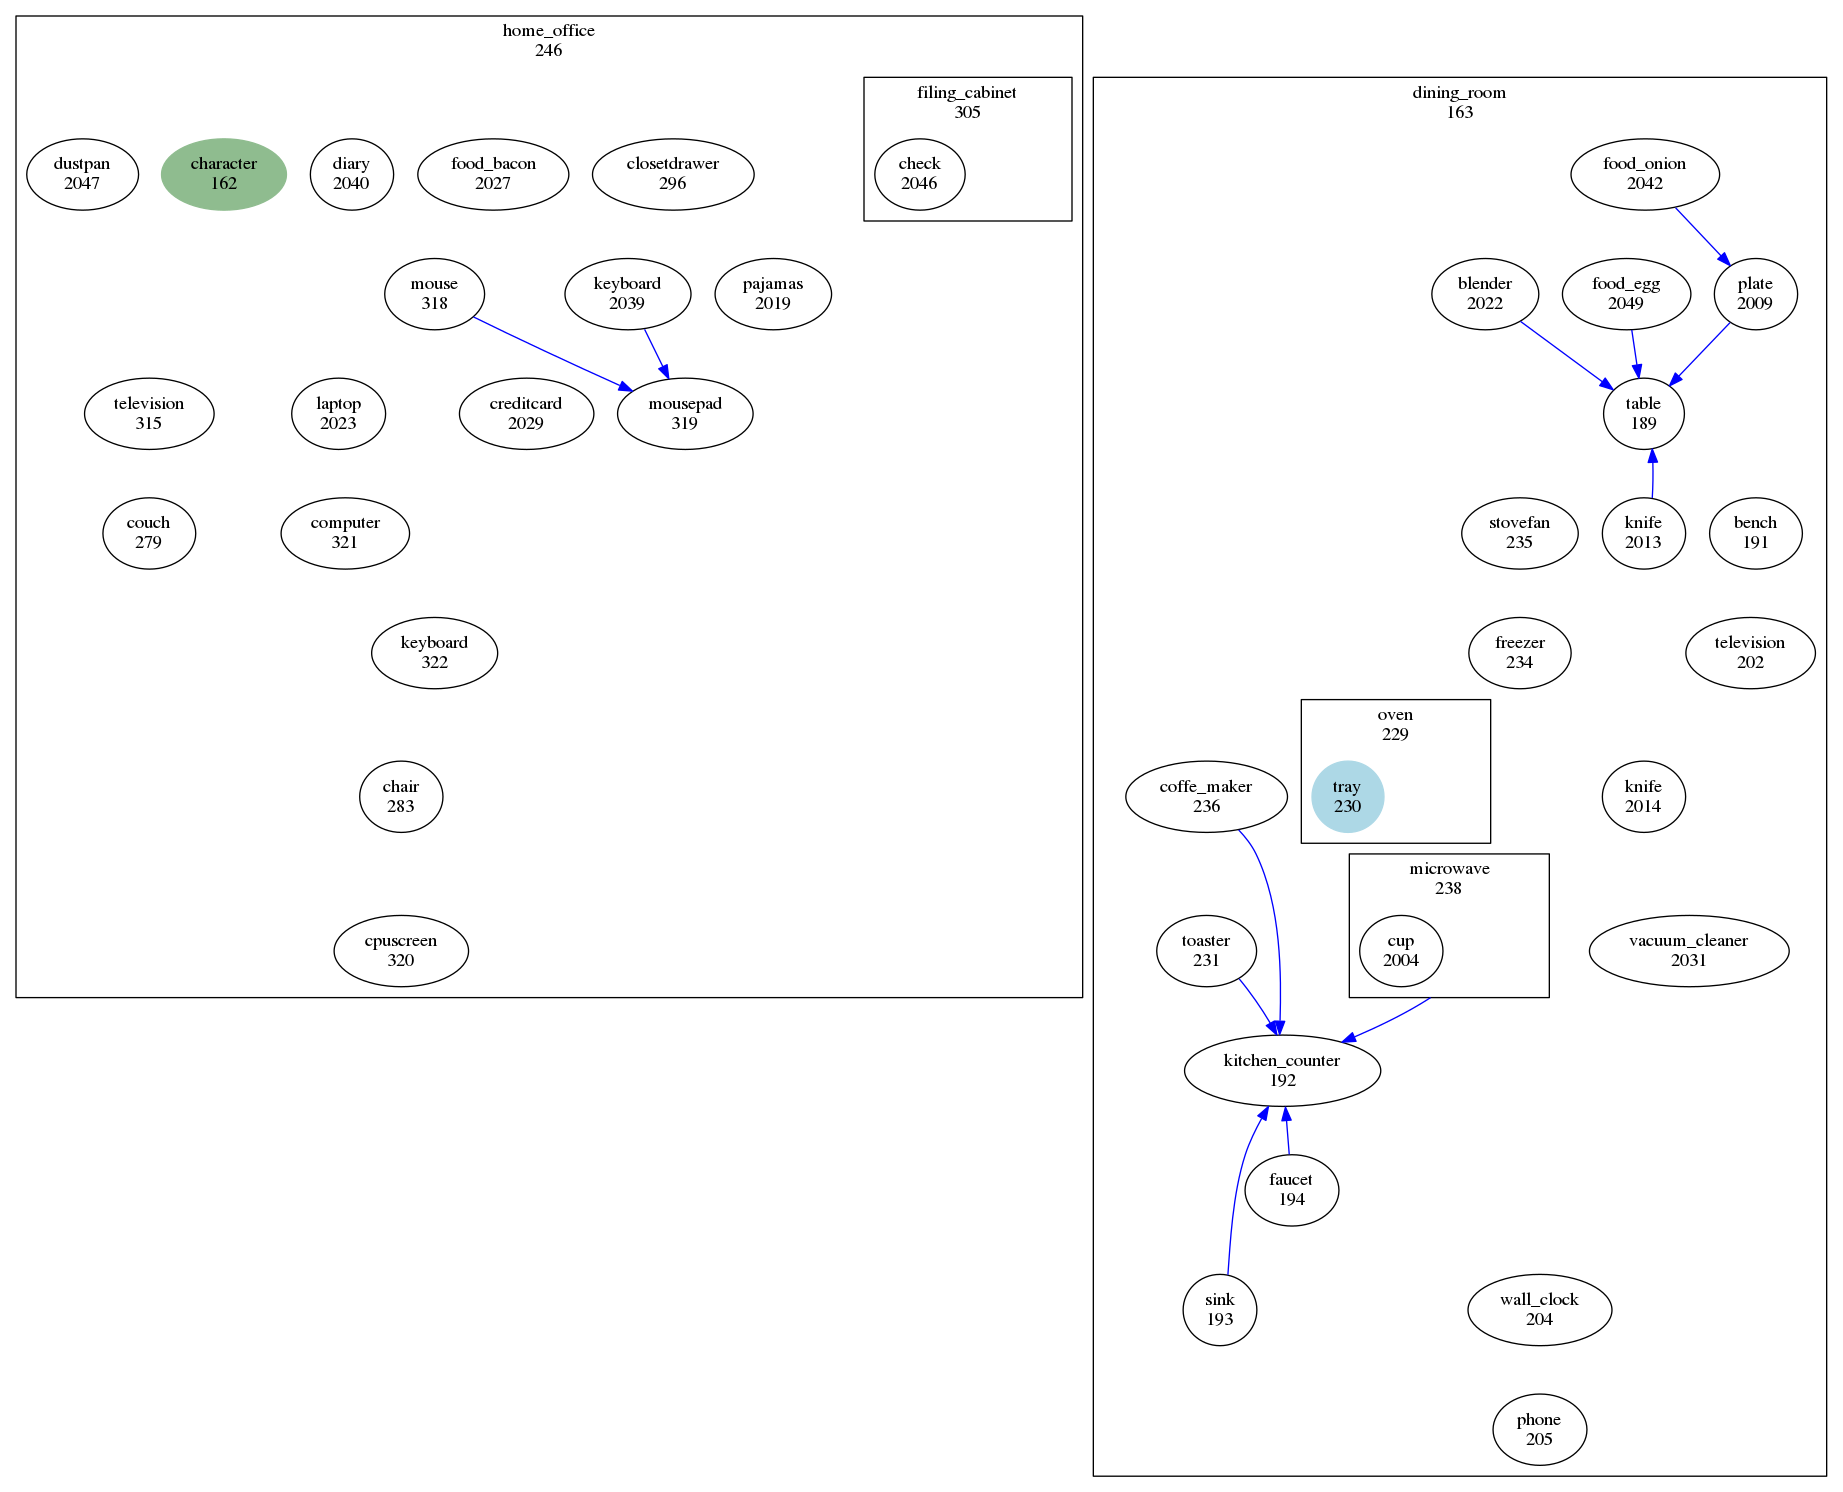

In [634]:
path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_45.json'
id_goal = 230
str_goal = 'findnode_{}'.format(id_goal)
id_agent = 162
args = utils.read_args()
args.max_steps = 1
args.dataset_folder = 'dataset_toy4'
args.interactive = True
#args.invertedge = True
dataset_interactive = envdataset.EnvDataset(args, process_progs=False)
print('Starting model...')
policy_net = SinglePolicy(dataset_interactive).cuda()
policy_net = torch.nn.DataParallel(policy_net)


goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net, use_belief=True)
single_agent.env.reset(path_init_env, goal_name)
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg/offp.False_eps.0.2_gamma.0.7/2019-11-14_00.45.32.080556/chkpt/chkpt_149.pt'
#weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg_invertedge.True/offp.False_eps.0.2_gamma.0.7/2019-11-20_10.26.22.830163/chkpt/chkpt_249.pt'
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
single_agent.env.reset(path_init_env, goal_name)
gt_state = single_agent.env.vh_state.to_dict()
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

## Correct belief

In [635]:
single_agent.env.reset(path_init_env, goal_name)
print(str_goal)
for i in range(10):
    curr_state = single_agent.env.vh_state.to_dict()
    visible_ids = single_agent.env.observable_object_ids_n[0]
    graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(
                curr_state, visible_ids, str_goal)
    instruction, logits = single_agent.sample_instruction(single_agent.dataset, graph_data,
                                                  action_logits, o1_logits, o2_logits)
    instr = list(zip(*instruction))[0]
    str_instruction = utils.pretty_instr(instr)
    print(str_instruction)
    resp = single_agent.env.step({0: str_instruction})

findnode_230
[walk] <dining_room> (163) 
[walk] <oven> (229) 
[turnto] <food_onion> (2042) 
[open] <oven> (229) 
[open] <microwave> (238) 
[touch] <tray> (230) 
[walk] <plate> (2009) 
[walk] <tray> (230) 
[turnto] <food_onion> (2042) 
[walk] <stovefan> (235) 


In [636]:
from vh_graph.envs import belief

### Wrong belief


In [647]:
id_goal = 230
str_goal = 'findnode_{}'.format(id_goal)
single_agent.previous_belief_graph = None
single_agent.env.reset(path_init_env, goal_name)


[{'edges': [{'from_id': 279, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 283, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 305, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 315, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 318, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 319, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 320, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 321, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 322, 'relation_type': 'INSIDE', 'to_id': 246},
   {'from_id': 318, 'relation_type': 'ON', 'to_id': 319},
   {'from_id': 279, 'relation_type': 'CLOSE', 'to_id': 315},
   {'from_id': 283, 'relation_type': 'CLOSE', 'to_id': 322},
   {'from_id': 283, 'relation_type': 'CLOSE', 'to_id': 321},
   {'from_id': 283, 'relation_type': 'CLOSE', 'to_id': 320},
   {'from_id': 283, 'relation_type': 'CLOSE', 'to_id': 319},
   {'from_id': 283, 'relation_type': 'CLOSE', 'to_id': 318},
   {'from

Edges...


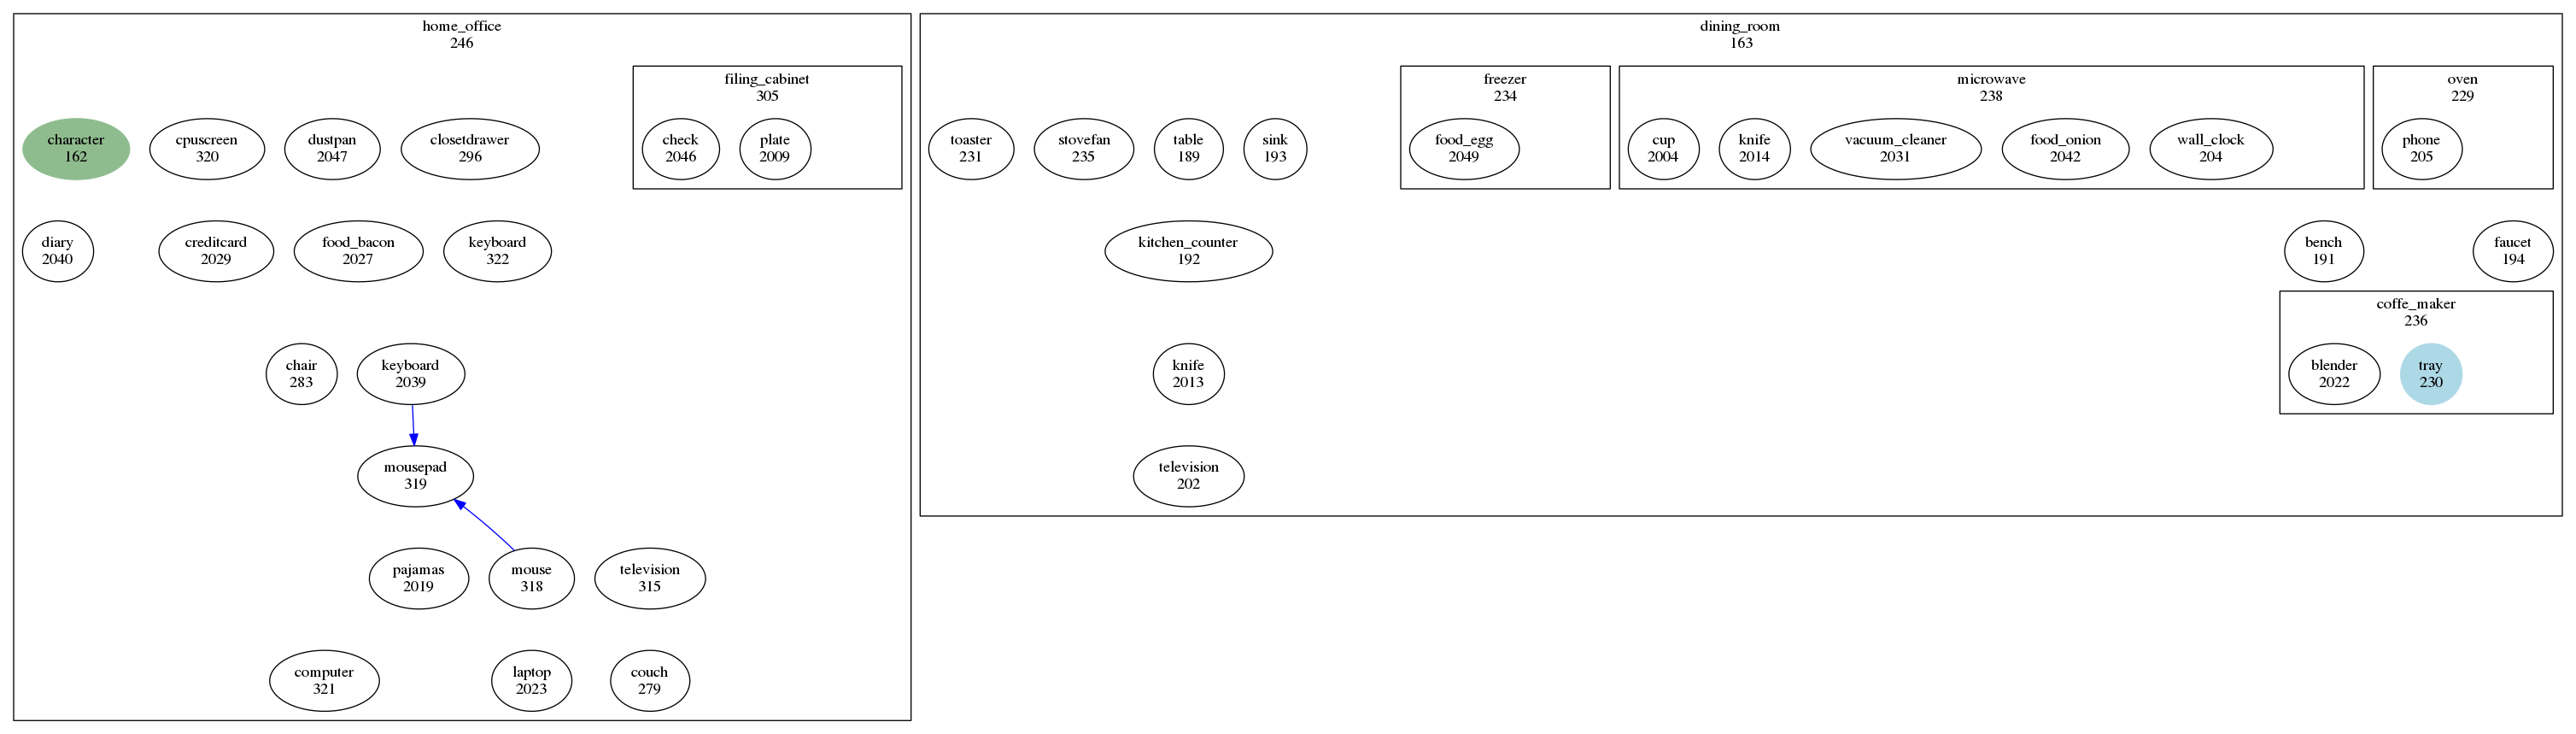

In [648]:
import numpy as np
import random
seed = 869
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
single_agent.previous_belief_graph = None
obs_graph = single_agent.get_observations()
single_agent.sample_belief(obs_graph)

graph = utils_viz.graph2im(single_agent.belief_sim.vh_state.to_dict(), {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))


In [649]:
# str_goal = 'findnode_230'

# curr_state = single_agent.belief_sim.vh_state.to_dict()
# visible_ids = single_agent.belief_sim.observable_object_ids_n[0]
# print(visible_ids)
# graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(
#         curr_state, visible_ids, str_goal)
# instruction, logits = single_agent.sample_instruction(single_agent.dataset, graph_data,
#                                           action_logits, o1_logits, o2_logits)
# instr = list(zip(*instruction))[0]
# str_instruction = utils.pretty_instr(instr)
# _ = single_agent.belief_sim.step({0: str_instruction})
# _ = single_agent.env.step({0: str_instruction})

[walk] <dining_room> (163)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <television> (202)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <dining_room> (163)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <freezer> (234)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <television> (202)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <sink> (193)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <dining_room> (163)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <television> (202)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <sink> (193)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <dining_room> (163)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <dining_room> (163)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 236}]
[walk] <dining_room> (163)  [{'from_id': 230, 'relati

[walk] <tray> (230)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 229}]
[turnto] <knife> (2014)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 229}]
[turnto] <home_office> (246)  [{'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 229}]
Edges...
CLOSE_CHAR
CLOSE_CHAR


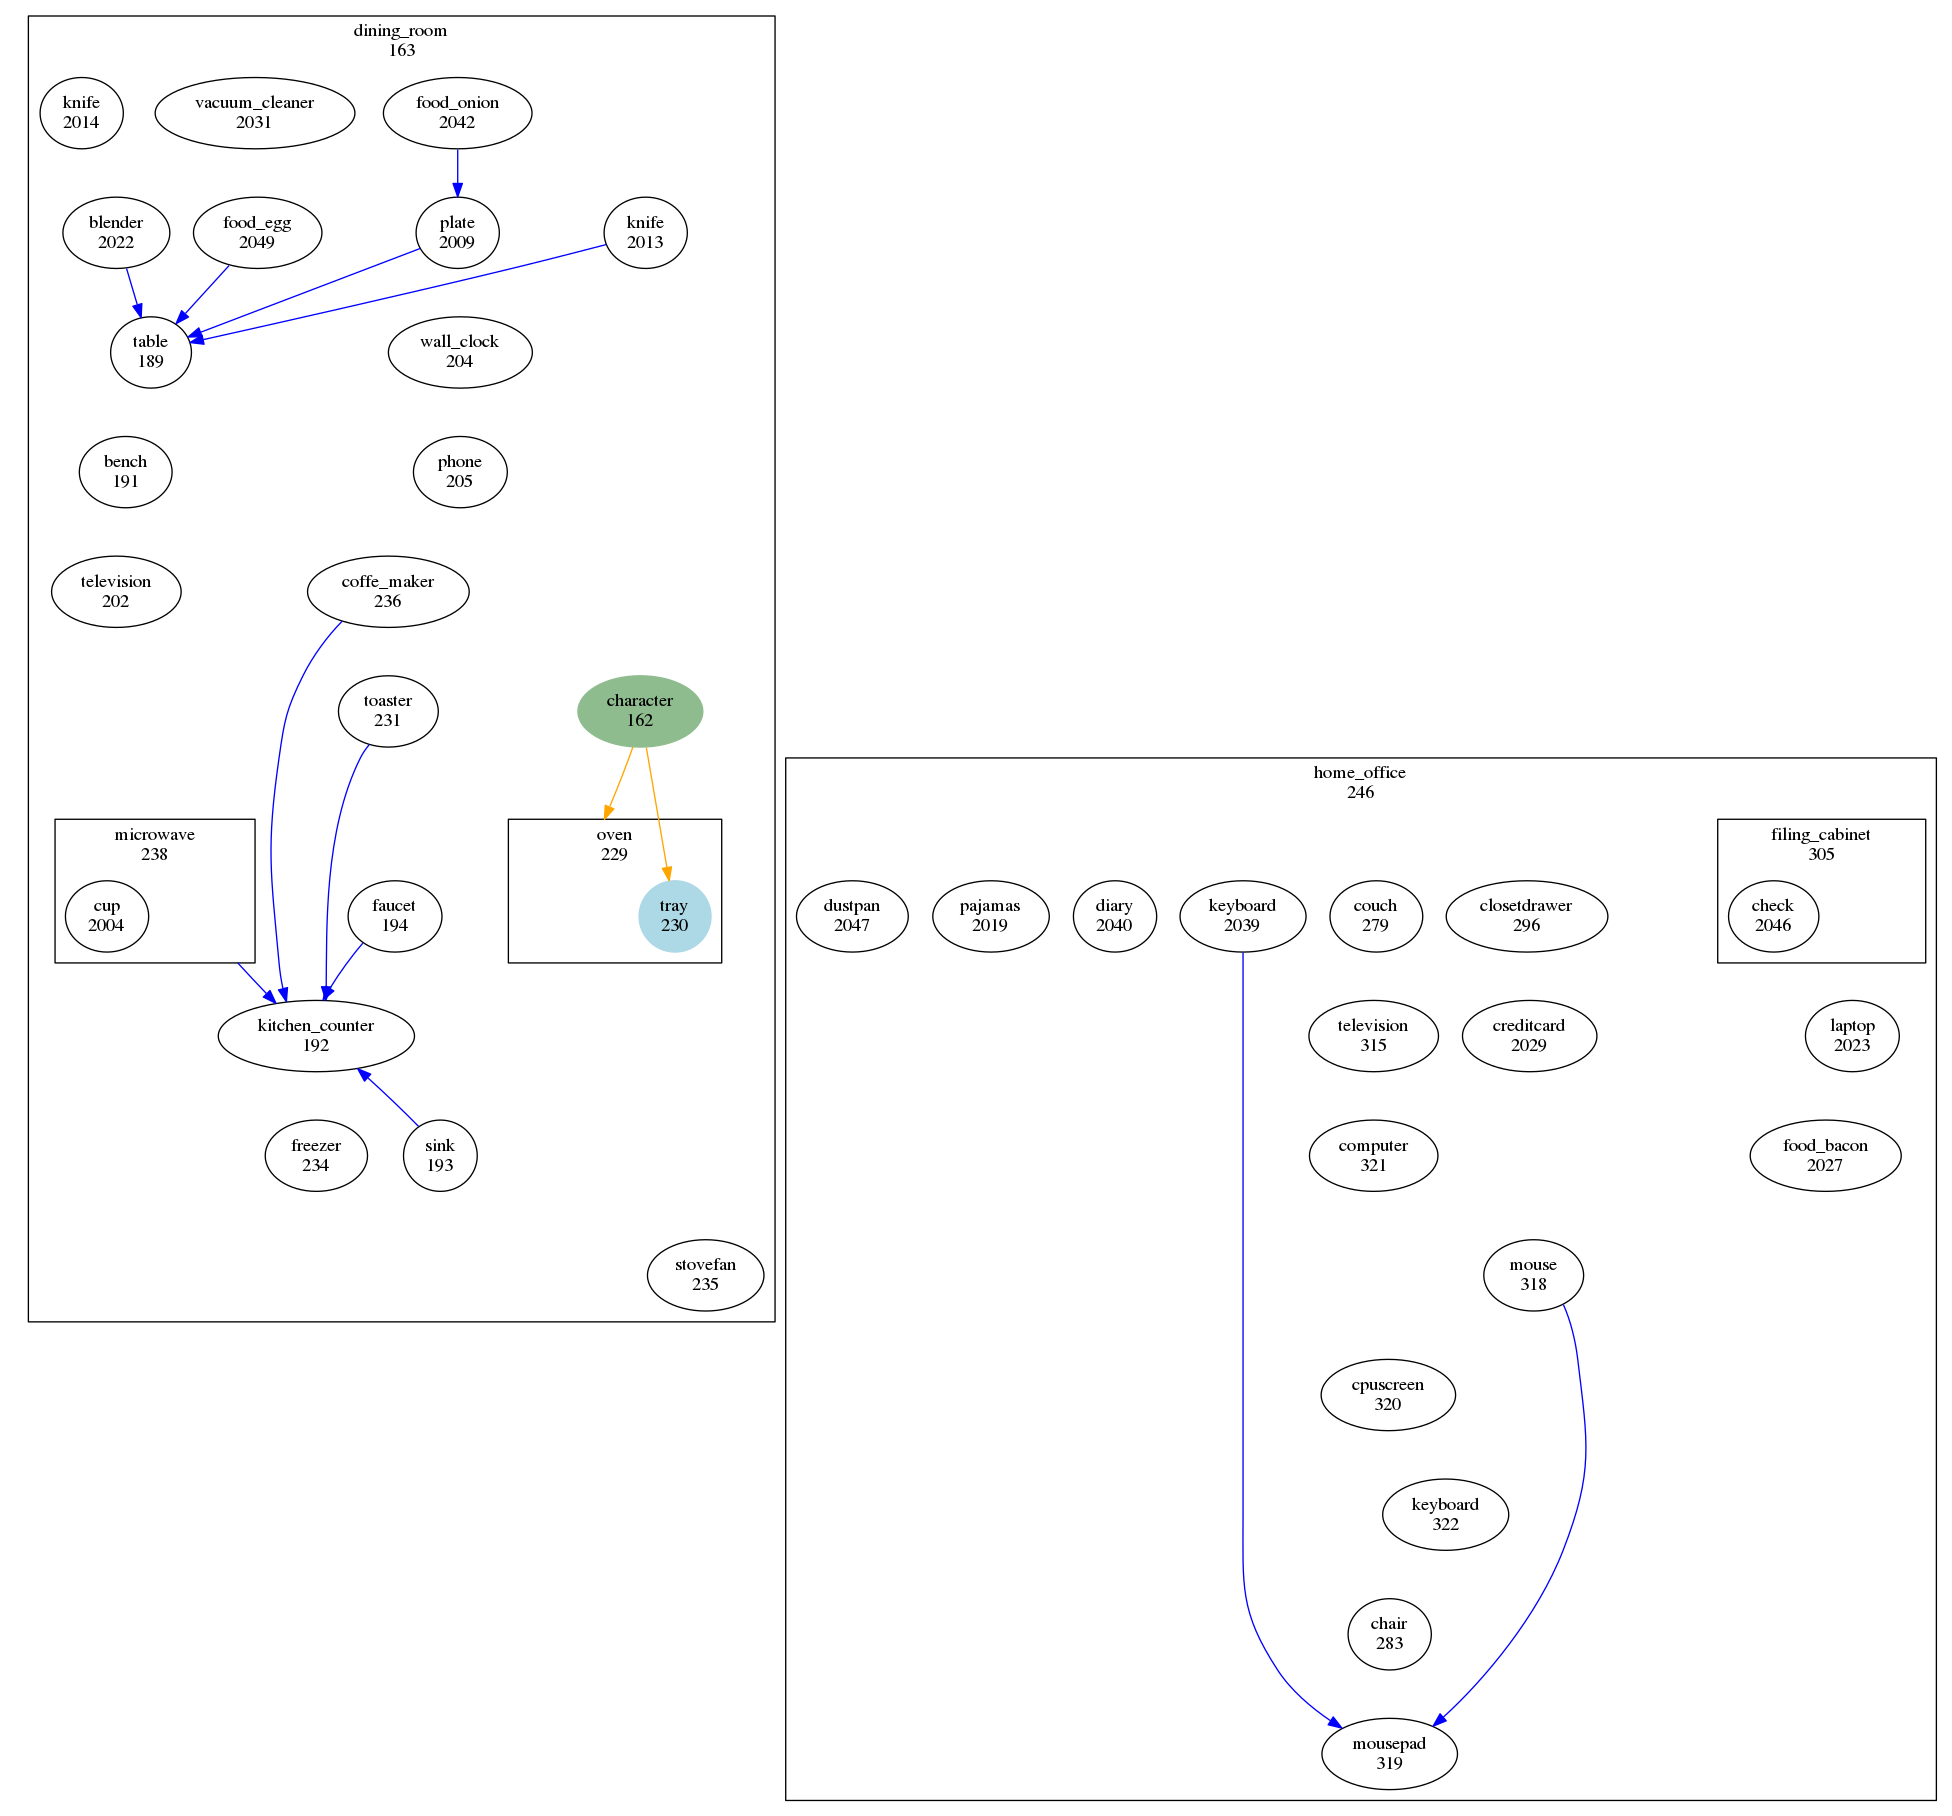

In [650]:
for i in range(100):
    #gt_graph = single_agent.env.vh_state.to_dict()
    #print([x for x in gt_graph['edges'] if x['from_id'] == 162])
    #print(single_agent.env.get_action_space(action='open'))
    _, instruction, _, _, _ = single_agent.one_step_rollout(str_goal, False, use_belief=True)
    graph_belief = single_agent.belief_sim.vh_state.to_dict()
    edge_interest = [x for x in graph_belief['edges'] if x['from_id'] == id_goal and x['relation_type'] != 'CLOSE']
    print(instruction, edge_interest)
graph = utils_viz.graph2im(single_agent.belief_sim.vh_state.to_dict(), {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))


In [651]:
_, instruction, _, _, _ = single_agent.one_step_rollout(str_goal, False, use_belief=True)
print(instruction)
graph_belief = single_agent.belief_sim.vh_state.to_dict()
edge_interest = [x for x in graph_belief['edges'] if x['from_id'] == 230]
print(edge_interest)

[turnto] <dining_room> (163) 
[{'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 192}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 162}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 229}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 234}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 235}, {'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 229}]


In [652]:
_, instruction, _, _, _ = single_agent.one_step_rollout(str_goal, False, use_belief=True)
print(instruction)
graph_belief = single_agent.belief_sim.vh_state.to_dict()
edge_interest = [x for x in graph_belief['edges'] if x['from_id'] == 230]
print(edge_interest)

[turnto] <faucet> (194) 
[{'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 192}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 162}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 229}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 234}, {'from_id': 230, 'relation_type': 'CLOSE', 'to_id': 235}, {'from_id': 230, 'relation_type': 'INSIDE', 'to_id': 229}]


## State from belief

Edges...


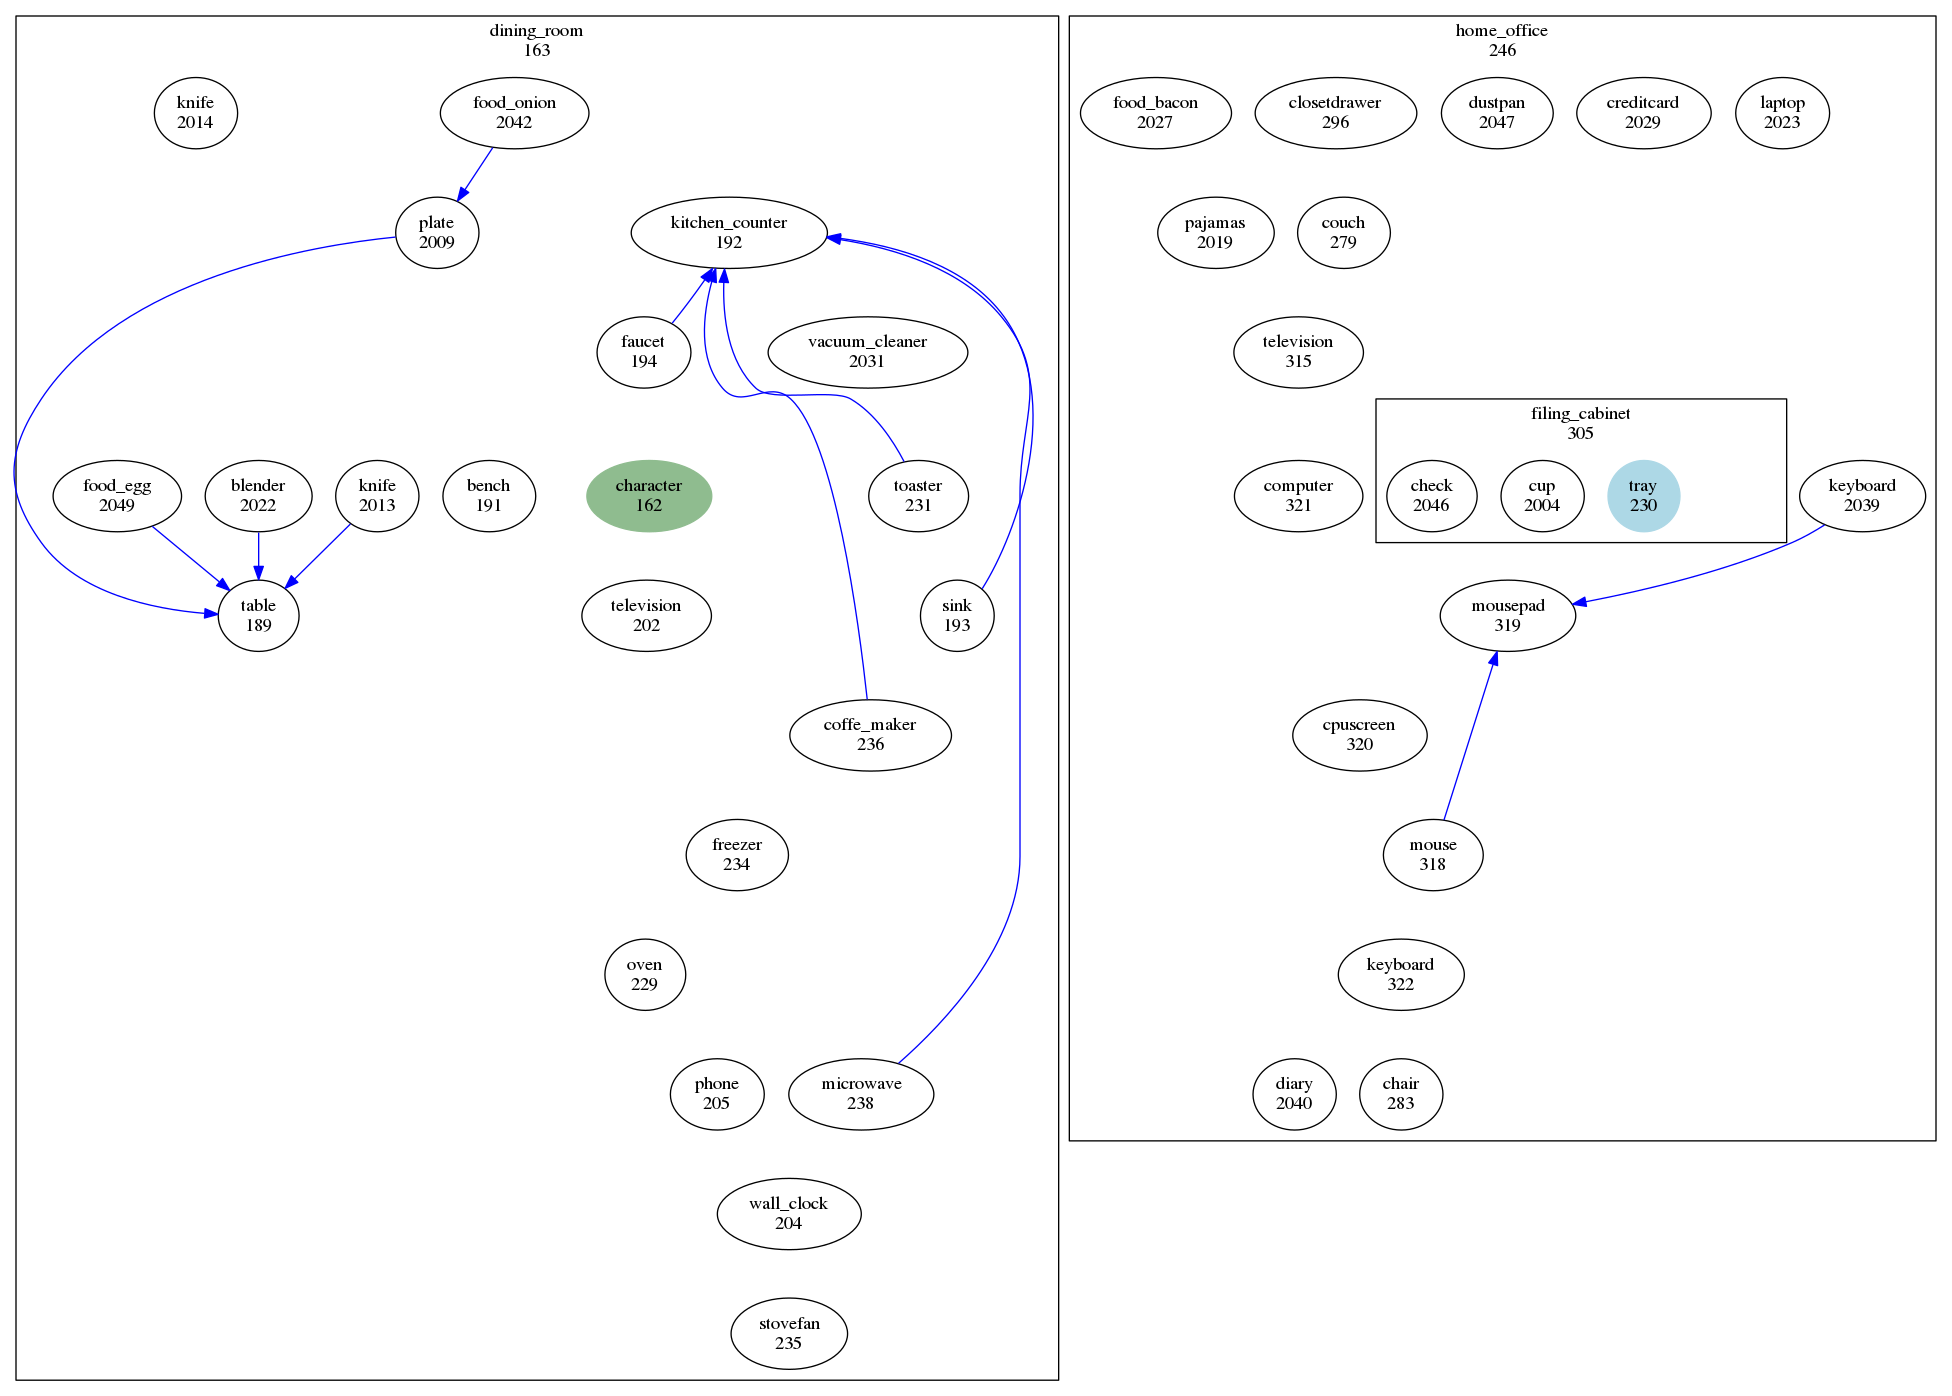

In [847]:
obs_graph = single_agent.get_observations()
single_agent.sample_belief(obs_graph)

graph_belief = single_agent.belief_sim.vh_state.to_dict()
graph = utils_viz.graph2im(graph_belief, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

Edges...
CLOSE_CHAR


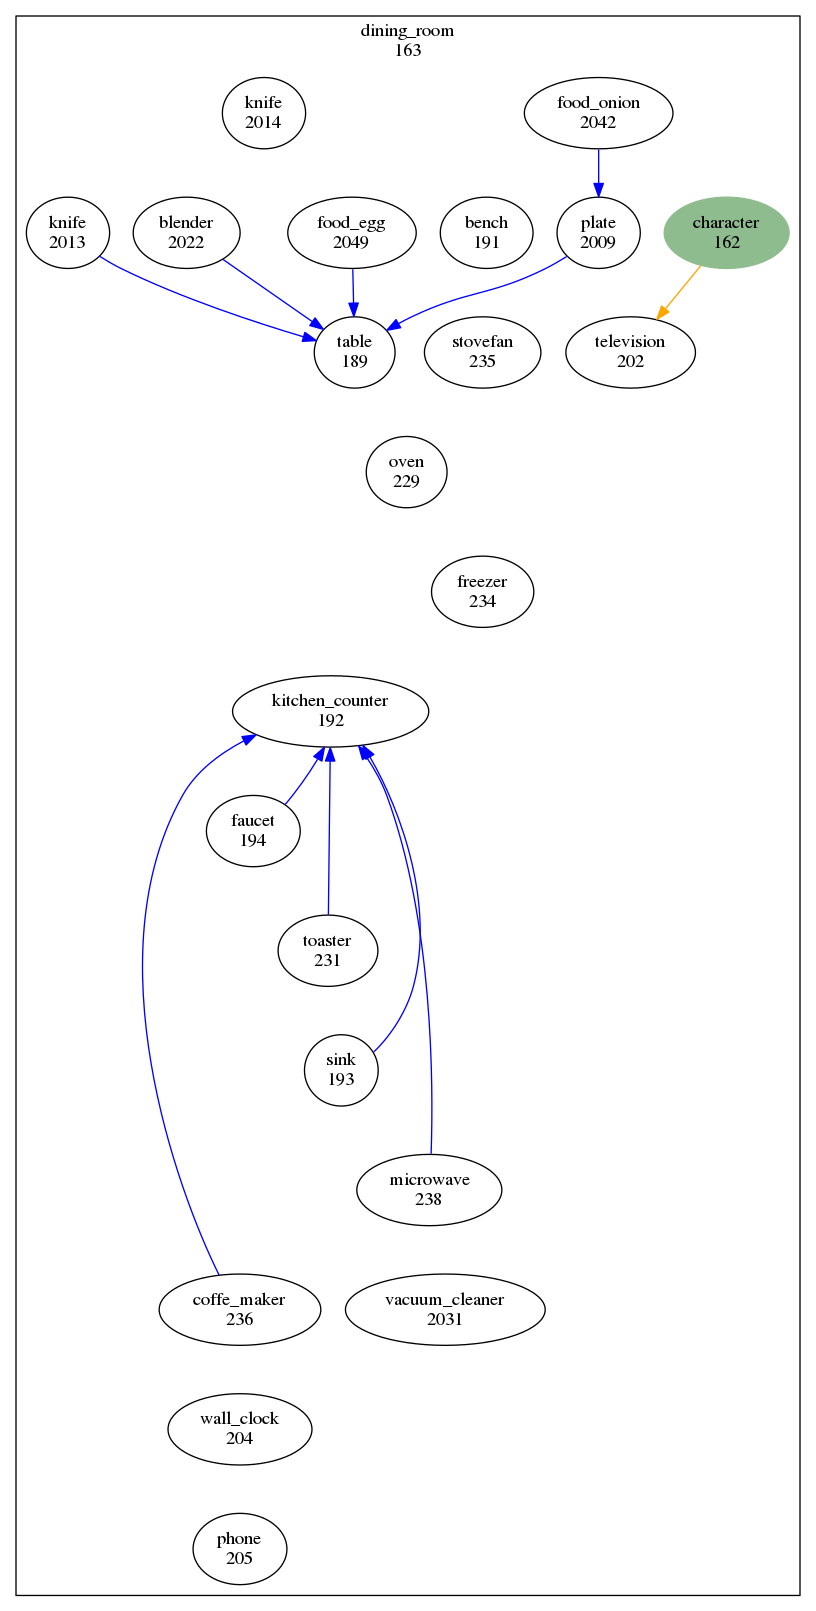

In [569]:
observations = single_agent.get_observations()
#single_agent.sample_belief(observations)
graph_belief = single_agent.belief_sim.vh_state.to_dict()

obs_graph = single_agent.belief_sim.vh_state.to_dict()
graph = utils_viz.graph2im(observations, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [39]:
resp = env_belief.step({0: str_instruction})

Edges...
CLOSE_CHAR


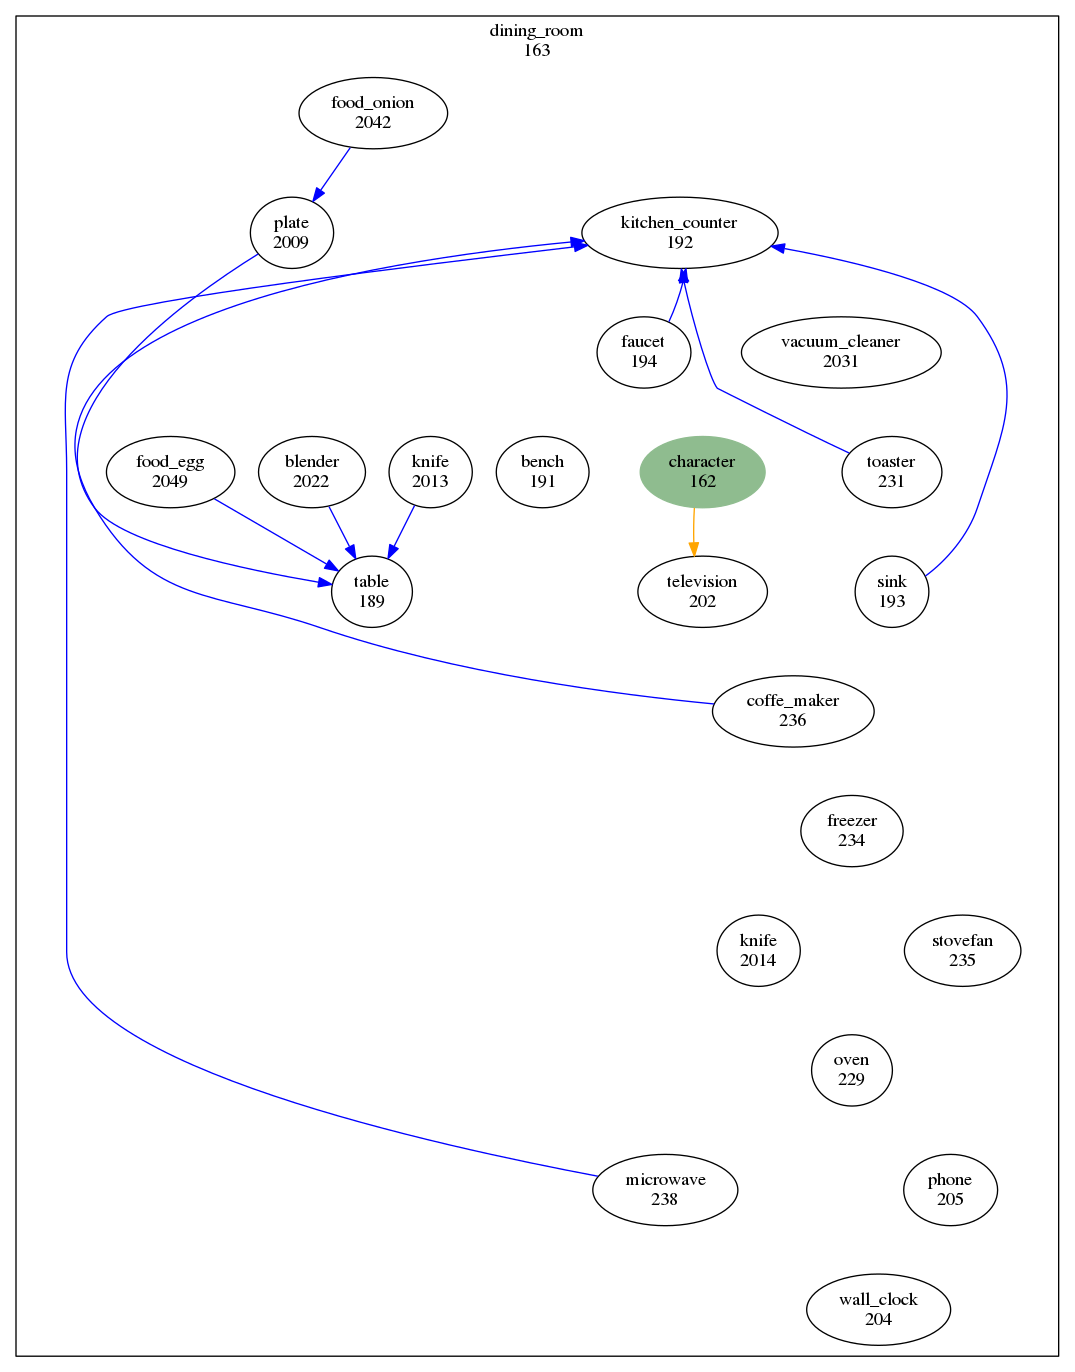

In [568]:

obs_graph = single_agent.get_observations()
#print(obs_graph)
graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))
import copy
curr_state_save = copy.deepcopy(curr_state)

In [41]:
curr_state = bel.update_graph_from_gt_graph(curr_state, obs_graph)

In [23]:
[x for x in obs_graph['nodes'] if x['id'] == 189]

[{'id': 189,
  'class_name': 'table',
  'category': 'Furniture',
  'properties': ['MOVABLE', 'SURFACES'],
  'states': [],
  'prefab_name': None,
  'bounding_box': None}]

In [203]:
curr_state = copy.deepcopy(curr_state_save)

### Multiple step rollout

In [ ]:
def one_step_rollout(env, goal_string, pomdp):
    if pomdp:
        curr_state = single_agent.get_observations()
        visible_ids = None
    else:
        curr_state = single_agent.env.vh_state.to_dict()
        visible_ids = single_agent.env.observable_object_ids_n[0]
    
    graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(curr_state, visible_ids, goal_string)
    instruction, logits = single_agent.sample_instruction(dataset_interactive, graph_data, 
                                                          action_logits, o1_logits, o2_logits, pick_max=True)
    #instruction = single_agent.get_top_instruction(dataset_interactive, graph_data, action_logits, o1_logits, o2_logits)
    logits = None
    instr = list(zip(*instruction))[0]
    str_instruction = utils.pretty_instr(instr)
    if 'stop' in str_instruction:
            return None, str_instruction, logits
    resp = single_agent.env.step({0: str_instruction})
    return resp, str_instruction, logits

In [ ]:
args.pomdp = False
weights = 'logdir/dataset_folder.dataset_toy3_pomdp.False_graphsteps.3/2019-11-06_09.14.31.202175/chkpt/chkpt_49.pt'
state_dict = torch.load(weights)
single_agent.policy_net.load_state_dict(state_dict['model_params'])

curr_env.reset(path_init_env, goal_name)
max_instr = 0
instr = ''
goal_str = 'findnode_315'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

In [ ]:
curr_env.reset(path_init_env, goal_name)
max_instr = 0
instr = ''
goal_str = 'findnode_301'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

### Back to non POMDP

In [ ]:
%autoreload 2

In [ ]:

path_init_env = "dataset_toy3/init_envs/TrimmedTestScene6_graph_28.json"
goal_name = '(facing living_room[1] living_room[1])'
curr_env.reset(path_init_env, {0: goal_name})
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net)

# Starting the scene
curr_state = single_agent.get_observations()
gt_state = single_agent.env.vh_state.to_dict()

# All the nodes
nodes, _, ids_used = dataset_interactive.process_graph(gt_state)
class_names, object_ids, _, mask_nodes, _ = nodes

In [ ]:
graph = utils_viz.graph2im(gt_state, {320: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [ ]:
args.pomdp = False
weights = 'logdir/dataset_folder.dataset_toy3_pomdp.False_graphsteps.3/2019-11-06_09.14.31.202175/chkpt/chkpt_49.pt'
state_dict = torch.load(weights)
single_agent.policy_net.load_state_dict(state_dict['model_params'])
curr_env.reset(path_init_env, {0:goal_name})
max_instr = 0
instr = ''
goal_str = 'findnode_320'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

In [ ]:
args.pomdp = True
weights = 'logdir/dataset_folder.dataset_toy3_pomdp.True_graphsteps.3/2019-11-06_09.13.35.555005/chkpt/chkpt_49.pt'
state_dict = torch.load(weights)
single_agent.policy_net.load_state_dict(state_dict['model_params'])
curr_env.reset(path_init_env, {0:goal_name})
max_instr = 0
instr = ''
goal_str = 'findnode_320'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

> /data/vision/torralba/frames/data_acquisition/SyntheticStories/MultiAgent/vh_multiagent_models/utils_viz.py(110)graph2im()
-> if curr_subgraph_id not in parent:
(Pdb) c
Edges...
CLOSE_CHAR
CLOSE_CHAR


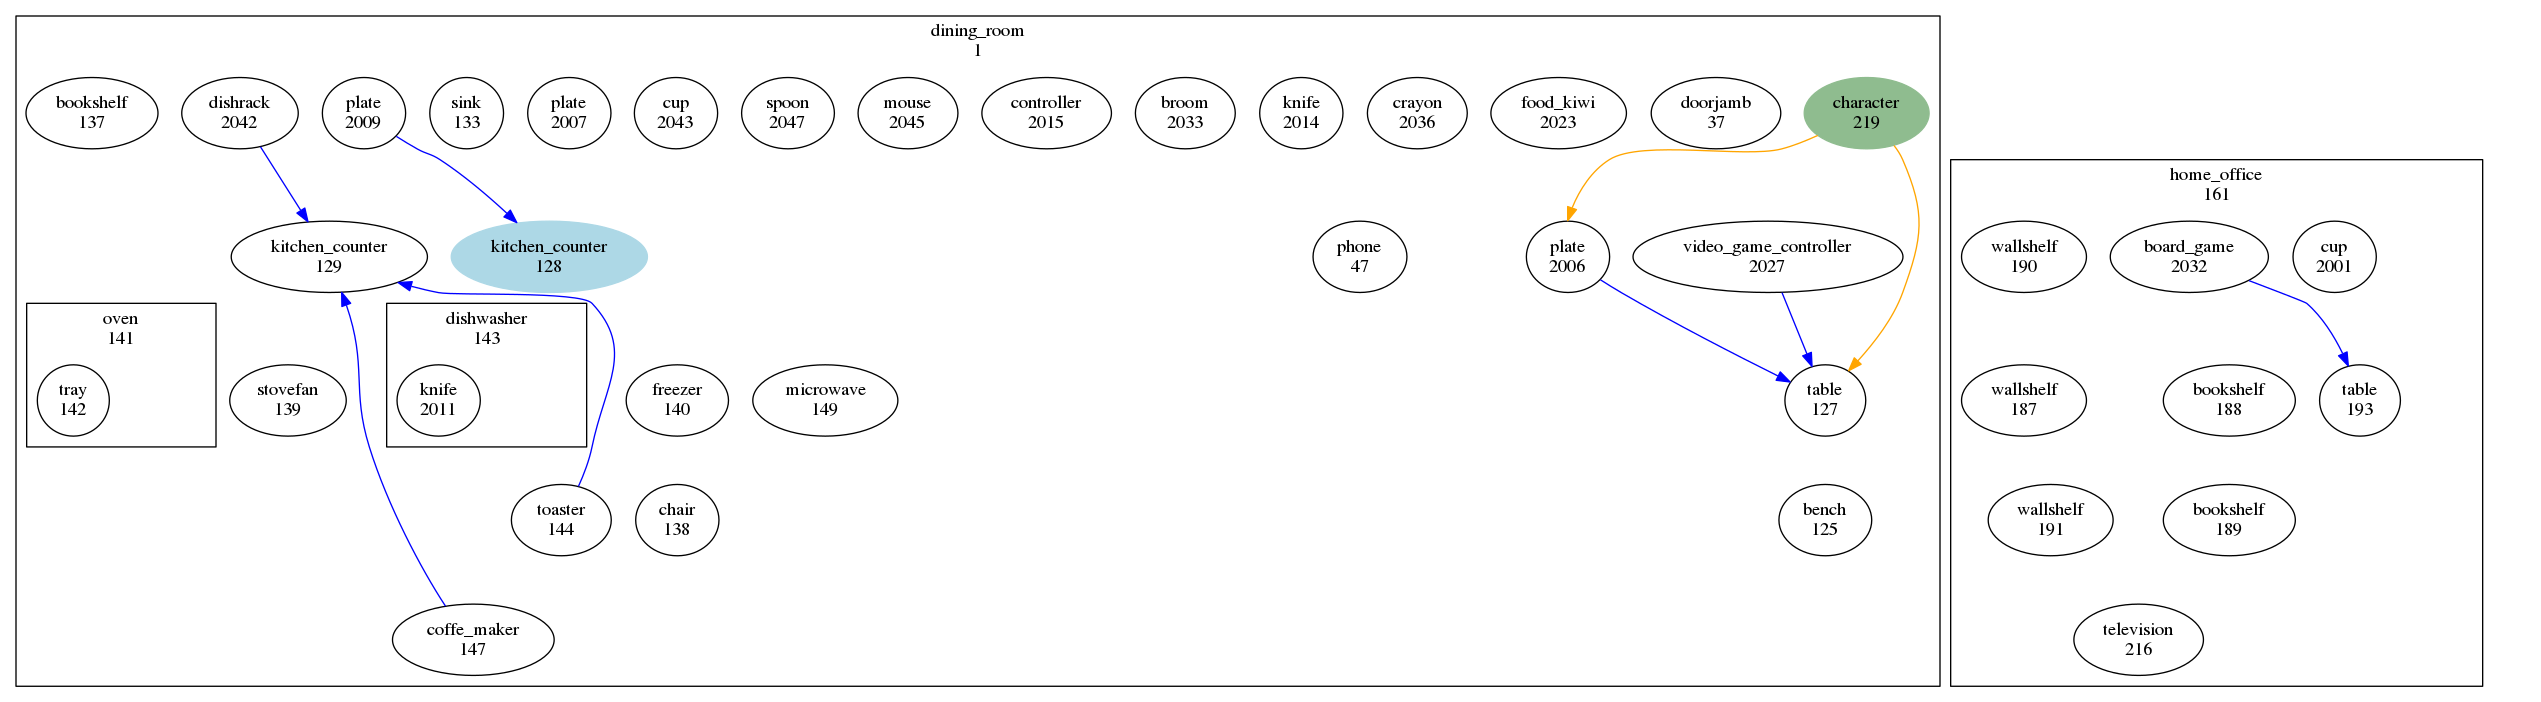

In [17]:
import json
time = 2
goal_name = '(facing living_room[1] living_room[1])'
with open('dataset_toy4/init_envs/TrimmedTestScene3_graph_31_multiple_21.json', 'r') as f:
    graph_multiple = json.load(f)

gt_state = graph_multiple[time][1]
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
graph = utils_viz.graph2im(gt_state, {128: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [15]:
reload(utils_viz)

NameError: name 'reload' is not defined

In [452]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
bel.update_from_gt_graph

NameError: name 'bel' is not defined